<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
타깃 하나로만 이루어진 리프노드를 순수노드(pure node)라고 한다.
순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미이다.
즉 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있다.

회귀 문제에도 트리를 사용할 수 있다. 예측을 하려면 각 노드의 테스트 결과에 따라 트리를 탐색해나가고
새로운 데이터 포인트에 해당되는 리프 노드를 찾는다. 찾은 리프 노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.

---- 결정 트리의 복잡도 제어하기 ----
일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합된다.
순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미이다.
즉 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있다.ex) 아래 depth=9 그래프
과대적합을 막는 전략은 크게 두 가지이다.
트리 생성을 일찍 중단하는 전략(사전 가지치기 pre-pruning)과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략이다.
(post-pruning 또는 그냥 pruning). 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것이다.
scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있다.
scikit-learn은 사전 가지치기만 지원한다.

유방암 데이터셋을 이용하여 사전 가지치기의 효과를 자세히 확인해보겠다.
먼저 데이터셋을 읽은 후 훈련 세트와 테스트 세트로 나눈다.
그런 후에 기본값 설정으로 완전한 트리(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리) 모델을 만든다.
random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교한다.


In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=5eb15dab5590de51fc3a8db077a13c59c793cad3f2479e801b9b164887dd4391
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [6]:
import matplotlib.pyplot as plt
import mglearn

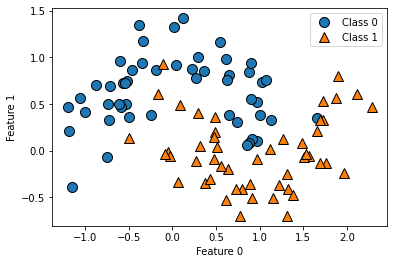

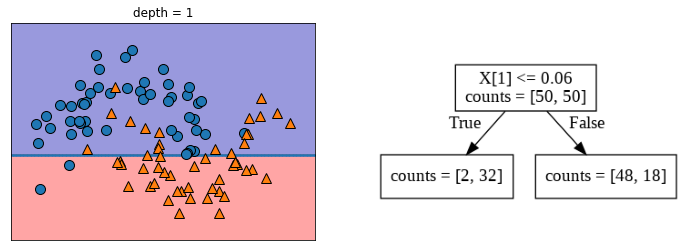

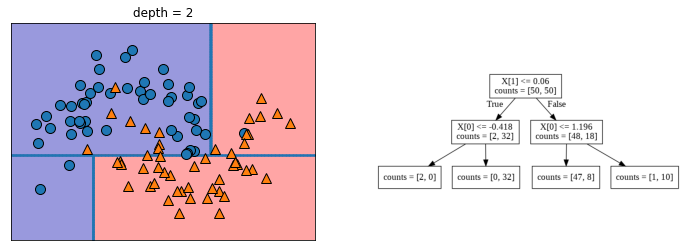

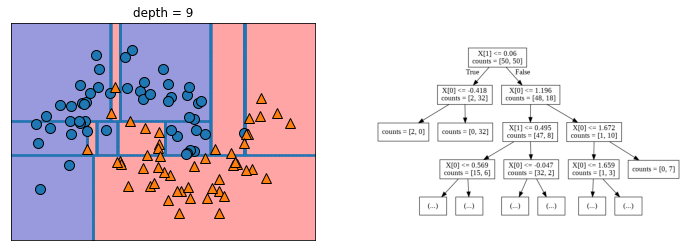

In [7]:
mglearn.plots.plot_tree_progressive()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도: {}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {}".format(tree.score(X_test, y_test)))




훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.9300699300699301


In [ ]:
기대한 대로 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다.
즉 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌다.
테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95% 보다 조금 낮다.(LogisticRegression)
결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있다.
그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않는다.
이제 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠다.
한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것이다.
max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한한다.
트리 깊이를 제한하면 과대적합이 줄어든다. 이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선시킨다.

In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

print("훈련 세트 정확도: {}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {}".format(tree.score(X_test, y_test)))



훈련 세트 정확도: 0.9953051643192489
테스트 세트 정확도: 0.951048951048951


In [ ]:
결정 트리 분석
트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화할 수 있습니다.
이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다.
각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵셥을 주고 적절히 레이블되도록 클래스 이름과 특성 이름을 매개변수로 전달한다.
(export_graphviz 함수에 filled 매개변수를 True로 저장하면 노드의 클래스가 구분되도록 색으로 칠해진다.)

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names=cancer.feature_names,
                impurity=False, filled=True)
# 이 파일을 읽어서 graphviz 모듈을 사용해 시각화할 수 있다 (또는 .dot 파일을 읽을 수 있는 다른 프로그램을 사용해도 된다.)

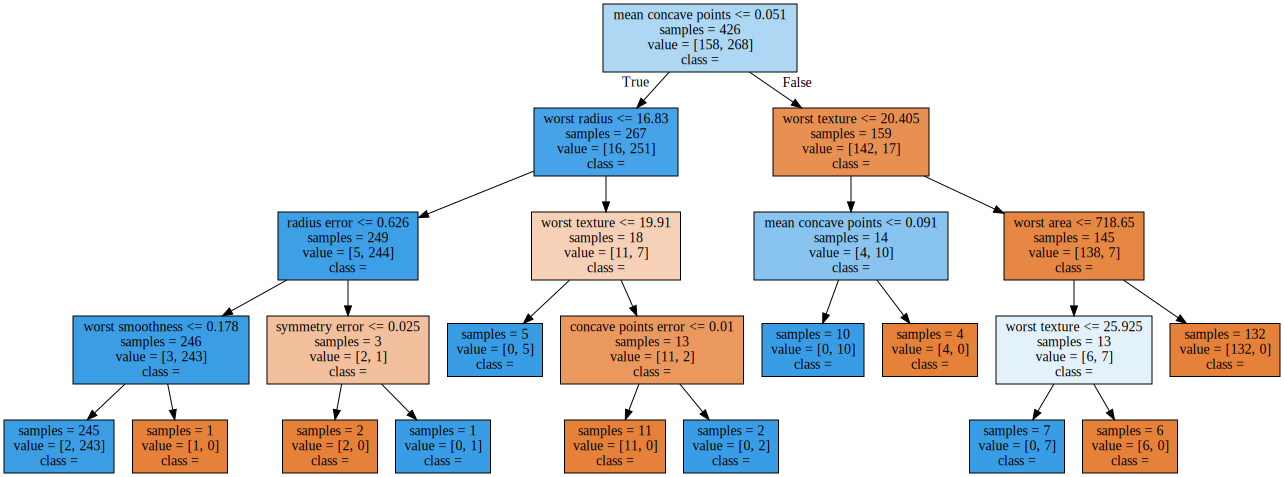

In [25]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))
# samples는 각 노드에 있는 샘플의 수를 나타내며 value는 클래스당 샘플의 수를 제공한다.